In [1]:
import os, sys

notebook_dir = os.getcwd()

#add path
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [2]:
from scripts.correlation import *
from scripts.load_data import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datas
raw_analyst_data = load_data("../../Data/raw_analyst_ratings.csv")
AAPL_data = load_data("../../Data/yfinance_data/AAPL_historical_data.csv")
AMZN_data = load_data("../../Data/yfinance_data/AMZN_historical_data.csv")
GOOG_data = load_data("../../Data/yfinance_data/GOOG_historical_data.csv")
META_data = load_data("../../Data/yfinance_data/META_historical_data.csv")
MSFT_data = load_data("../../Data/yfinance_data/MSFT_historical_data.csv")
NVDA_data = load_data("../../Data/yfinance_data/NVDA_historical_data.csv")
TSLA_data = load_data("../../Data/yfinance_data/TSLA_historical_data.csv")

Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!
Data loaded successfully!


In [5]:
import pandas as pd

# Drop rows with NaT values in the date column
raw_analyst_data = raw_analyst_data.dropna(subset=['date'])
raw_analyst_data

,Unnamed: 0,headline,url,publisher,date,stock,year
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020.0
...,...,...,...,...,...,...,...
1407266,1413787,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,2018-01-05 11:47:36-04:00,ZX,2018.0
1407267,1413788,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,2017-12-06 09:12:01-04:00,ZX,2017.0
1407268,1413789,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,2017-12-06 07:04:31-04:00,ZX,2017.0
1407269,1413790,46 Biggest Movers From Yesterday,https://www.benzinga.com/news/17/11/10788120/4...,Lisa Levin,2017-11-15 06:04:52-04:00,ZX,2017.0


In [10]:
# Attempt to convert dates again
raw_analyst_data['date'] = pd.to_datetime(raw_analyst_data['date'], errors='coerce')
AMZN_data['Date'] = pd.to_datetime(AMZN_data['Date'], errors='coerce')

raw_analyst_data['year'] = raw_analyst_data['date'].dt.year
AMZN_data['year'] = AMZN_data['Date'].dt.year

# Check for any NaT values after conversion
if raw_analyst_data['date'].isnull().any():
    print("There are still unparseable dates in raw_analyst_data.")
else:
    print("All dates in raw_analyst_data are parseable.")

if AMZN_data['Date'].isnull().any():
    print("There are unparseable dates in AMZN_data.")
else:
    print("All dates in AMZN_data are parseable.")

# Merge the data
merged_data = pd.merge(raw_analyst_data, AMZN_data, on='year', how='inner')

merged_data = merged_data.sample(n=1000000)
# Sentiment analysis
merged_data['sentiment'] = analyze_sentiment_vader(merged_data['headline'].tolist())

# Calculate daily stock returns
merged_data['daily_return'] = merged_data['Close'].pct_change()

# Display the merged data
merged_data

All dates in raw_analyst_data are parseable.
All dates in AMZN_data are parseable.


,Unnamed: 0,headline,url,publisher,date,stock,year,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment,daily_return
8755813,892668,Stocks That Hit 52-Week Highs On Monday,https://www.benzinga.com/news/20/02/15238230/s...,Lisa Levin,2020-02-03 12:44:05-04:00,NEA,2020,2020-11-18,156.699997,157.000000,155.255005,155.272995,155.272995,58336000,0.0,0.0,0.0000,NaN
9492395,964882,8 Biggest Mid-Day Gainers For Wednesday,https://www.benzinga.com/news/16/07/8214160/8-...,Lisa Levin,2016-07-13 12:46:35-04:00,OSHC,2016,2016-01-21,28.679001,29.440500,28.410999,28.750999,28.750999,99044000,0.0,0.0,0.0000,-0.814836
12789214,1271630,UK Foreign Minister Urging Holding Emergency U...,https://www.benzinga.com/news/20/02/15441723/u...,Benzinga Newsdesk,2020-02-28 11:05:47-04:00,TUR,2020,2020-02-27,96.719002,98.750000,94.138000,94.214996,94.214996,162880000,0.0,0.0,-0.5106,2.276929
9074957,921729,A Peek Into The Markets: US Stock Futures Mixe...,https://www.benzinga.com/news/earnings/20/05/1...,Lisa Levin,2020-05-28 06:20:56-04:00,NTAP,2020,2020-08-26,167.555496,172.587006,167.228500,172.092499,172.092499,130174000,0.0,0.0,0.0000,0.826593
13873066,1379026,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,XENE,2020,2020-10-19,164.980499,166.449997,159.636993,160.360504,160.360504,104472000,0.0,0.0,0.0000,-0.068173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161384,526942,Goodyear Tire & Rubber Earnings Preview,https://www.benzinga.com/news/earnings/12/02/2...,Nelson Hem,2012-02-13 07:29:58-04:00,FVL,2012,2012-03-26,9.824000,10.148500,9.775000,10.143500,10.143500,152274000,0.0,0.0,0.0000,-0.898606
4639646,477825,Once Beloved Momentum ETF Loses Its Momo,https://www.benzinga.com/news/16/10/8607867/on...,ETF Professor,2016-10-27 08:34:13-04:00,FBT,2016,2016-01-13,31.044001,31.044001,28.958000,29.090500,29.090500,153104000,0.0,0.0,0.2500,1.867896
10408876,1047353,Pzena Investment Mgmt Q1 EPS of $0.00 Vs $0.17...,https://www.benzinga.com/news/earnings/20/04/1...,Benzinga Newsdesk,2020-04-21 16:18:26-04:00,PZN,2020,2020-10-28,162.464996,163.201004,158.123505,158.139008,158.139008,111766000,0.0,0.0,0.0000,4.436105
8183325,827404,MiX Telematics Reports 'Major' Contract With N...,https://www.benzinga.com/news/20/01/15217727/m...,Benzinga Newsdesk,2020-01-30 10:34:14-04:00,MIXT,2020,2020-03-16,82.075500,87.972504,81.301498,84.457497,84.457497,178346000,0.0,0.0,-0.1280,-0.465929


In [11]:
merged_data
# raw_analyst_data
# print(AMZN_data)

,Unnamed: 0,headline,url,publisher,date,stock,year,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,sentiment,daily_return
8755813,892668,Stocks That Hit 52-Week Highs On Monday,https://www.benzinga.com/news/20/02/15238230/s...,Lisa Levin,2020-02-03 12:44:05-04:00,NEA,2020,2020-11-18,156.699997,157.000000,155.255005,155.272995,155.272995,58336000,0.0,0.0,0.0000,NaN
9492395,964882,8 Biggest Mid-Day Gainers For Wednesday,https://www.benzinga.com/news/16/07/8214160/8-...,Lisa Levin,2016-07-13 12:46:35-04:00,OSHC,2016,2016-01-21,28.679001,29.440500,28.410999,28.750999,28.750999,99044000,0.0,0.0,0.0000,-0.814836
12789214,1271630,UK Foreign Minister Urging Holding Emergency U...,https://www.benzinga.com/news/20/02/15441723/u...,Benzinga Newsdesk,2020-02-28 11:05:47-04:00,TUR,2020,2020-02-27,96.719002,98.750000,94.138000,94.214996,94.214996,162880000,0.0,0.0,-0.5106,2.276929
9074957,921729,A Peek Into The Markets: US Stock Futures Mixe...,https://www.benzinga.com/news/earnings/20/05/1...,Lisa Levin,2020-05-28 06:20:56-04:00,NTAP,2020,2020-08-26,167.555496,172.587006,167.228500,172.092499,172.092499,130174000,0.0,0.0,0.0000,0.826593
13873066,1379026,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,XENE,2020,2020-10-19,164.980499,166.449997,159.636993,160.360504,160.360504,104472000,0.0,0.0,0.0000,-0.068173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161384,526942,Goodyear Tire & Rubber Earnings Preview,https://www.benzinga.com/news/earnings/12/02/2...,Nelson Hem,2012-02-13 07:29:58-04:00,FVL,2012,2012-03-26,9.824000,10.148500,9.775000,10.143500,10.143500,152274000,0.0,0.0,0.0000,-0.898606
4639646,477825,Once Beloved Momentum ETF Loses Its Momo,https://www.benzinga.com/news/16/10/8607867/on...,ETF Professor,2016-10-27 08:34:13-04:00,FBT,2016,2016-01-13,31.044001,31.044001,28.958000,29.090500,29.090500,153104000,0.0,0.0,0.2500,1.867896
10408876,1047353,Pzena Investment Mgmt Q1 EPS of $0.00 Vs $0.17...,https://www.benzinga.com/news/earnings/20/04/1...,Benzinga Newsdesk,2020-04-21 16:18:26-04:00,PZN,2020,2020-10-28,162.464996,163.201004,158.123505,158.139008,158.139008,111766000,0.0,0.0,0.0000,4.436105
8183325,827404,MiX Telematics Reports 'Major' Contract With N...,https://www.benzinga.com/news/20/01/15217727/m...,Benzinga Newsdesk,2020-01-30 10:34:14-04:00,MIXT,2020,2020-03-16,82.075500,87.972504,81.301498,84.457497,84.457497,178346000,0.0,0.0,-0.1280,-0.465929


In [12]:
# Correlation analysis
correlation = merged_data['sentiment'].corr(merged_data['daily_return'])
print(f"Correlation between sentiment and stock returns: {correlation}")


Correlation between sentiment and stock returns: 0.0015659679160497848


In [13]:
# Granger causality test
granger_test = granger_causality_test(merged_data['sentiment'], merged_data['daily_return'])
print("Granger Causality Test Results:")
for lag, result in granger_test.items():
    print(f"Lag {lag}: p-value = {result[0]['ssr_ftest'][1]}")


ValueError: x contains NaN or inf values.

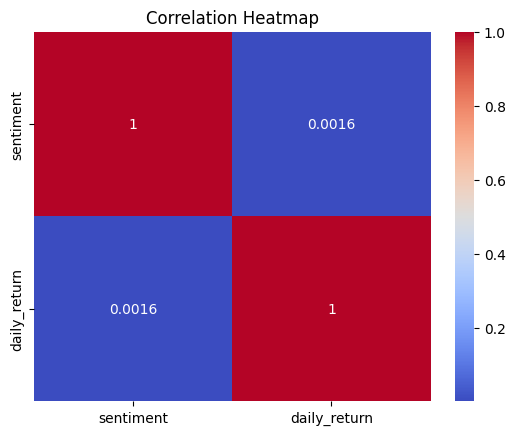

In [14]:
# Heatmap of correlations
correlation_matrix = merged_data[['sentiment', 'daily_return']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()